In [ ]:
! pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 6.0 MB 53.6 MB/s 
     |████████████████████████████████| 439 kB 80.0 MB/s 
     |████████████████████████████████| 1.7 MB 55.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# The problem statement is there is a specific dataset we need to predict binary
 #classification problem dataset, wether the customer is going to exit the bank or not. 
 # so by knowing the customer is going to exit the bank can take the forward steps like increasing customer services
 # so that the customer will not exit. This is the reason we are trying to create the model.
 # In the dataset the exited feature is the dependent feature and all other feature are independent features.

In [ ]:
# Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# Feature Engineering 
# We have categorical features in dataset so we will convert these to numerical data by get_dummies in pandas or we
# we can use onehot_encoder


geography=pd.get_dummies(X['Geography'], drop_first=True)
gender=pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
# Drop the old categorical feature as we are converted them to numerical features. and we will update in the X

X=X.drop(['Geography', 'Gender'], axis=1)

In [ ]:
# Concatinate the converted numerical features to X
X=pd.concat([X, geography, gender], axis=1)

In [ ]:
# Splittting the data into train and test data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0 )

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# Part 2 lets create the ANN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:
# now we have imported 
#1) Sequential
# we have 11 independent features, so in our input layer there will be 11 inputs. In the second layer i.e, hidden
# layer we have some neurons and we have another hidden layer with some neurons. The output layer will have only one
# neuron as it is a binary classification problem.
#So if we consider the entire neural network as one, the sequential 
# basically indicates that we will definately able to do fprward and backwad propogation.
#2) Dense basically means that we will be able to create the inputs and the neurons in the ANN.
#3) Activation basically means that we will be able to use all the activation functions.
#4) Dropout is used to prevent the overfitting of the ANN. so if we set the dropout value as 0.2 in 1st hidden layer
# it will randomly select the 30% of neurons in the layer and deactivate/dead those neurons.


In [30]:
# lets initialize the ANN
classifier = Sequential()

In [31]:
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [54]:
# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [55]:
# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu')) 
classifier.add(Dropout(0.3))

In [56]:
# Adding the output layer 
classifier.add(Dense(1, activation='sigmoid'))

In [57]:
# lets add the optimizers

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# by default the adam has the learning rate of 0.05 so no need to give the learning rate seperately.
# If you really want to provide your own learning rate :
# import tensorflow 
#opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

# And put this opt in the above code inplace of adam.

In [59]:
# Early stopping - what it means that, when the accuracy not at all increasing automatically the training of the model is stopped.
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.000,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [60]:
# lets train the model 

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.5540 - accuracy: 0.7962 - val_loss: 0.5048 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5181 - accuracy: 0.7962 - val_loss: 0.4896 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4946 - accuracy: 0.7962 - val_loss: 0.4722 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4766 - accuracy: 0.7962 - val_loss: 0.4590 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4733 - accuracy: 0.7962 - val_loss: 0.4544 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4643 - accuracy: 0.7962 - val_loss: 0.4534 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4659 - accuracy: 0.7962 - val_loss: 0.4528 - val_accuracy:

In [61]:
# We are running the model for thousand epochs which is huge. So what number should we set the number of epochs? the answer of this question is we use 
# early stopping.

In [62]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

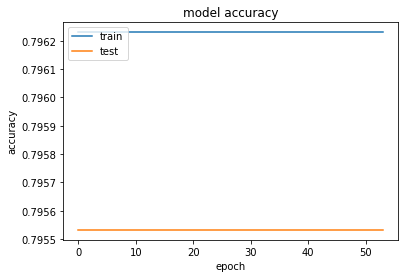

In [63]:
# summerize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

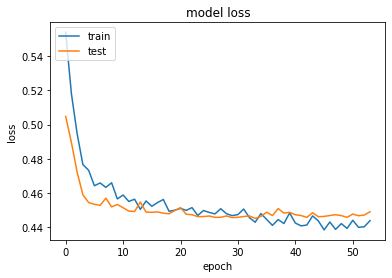

In [64]:
# summerize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [65]:
# part 3 - Making the prediction and evaluating the model

# Predicting the test set result
y_pred=classifier.predict(X_test)
y_pred= (y_pred >= 0.5)   # whenever the value of y_pred is greater than 0.5 it will take it as class 1

63/63 [==============================] - 0s 2ms/step


In [66]:
# Make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [67]:
# Calculating the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7975

In [68]:
# get the weights and these weights can be stored in a pickle also
classifier.get_weights()

[array([[ 0.5388994 , -0.24171658, -0.30491835, -0.01757616,  0.7292218 ,
         -0.09106487,  0.22873396,  0.00972711,  0.26985458,  0.45057806,
          0.24792242],
        [-0.2815293 , -1.1224331 ,  0.24114002,  0.10556158, -0.05876686,
          1.8613304 ,  0.24471237,  0.8266766 , -0.05008478,  0.42845288,
         -0.06348708],
        [-0.69550294,  0.11026128, -0.88520867,  0.34396777, -0.18898784,
          0.11578385,  0.17456836,  0.05612541, -0.05998382, -0.02490318,
          0.03305553],
        [ 0.10573359, -0.06281261,  0.5010791 , -0.336068  , -0.75347763,
          0.41502583, -0.11998925, -0.314481  ,  0.01941543,  0.56985354,
         -0.9066372 ],
        [ 0.97967535, -0.2124076 , -0.37050748,  1.4361398 ,  0.64458394,
         -0.4156471 ,  0.2680482 , -0.39562023,  0.66656727, -0.60390794,
         -1.3471516 ],
        [-0.1908122 , -0.18078366, -0.3090236 ,  0.06047472, -0.5035378 ,
         -0.26245332, -0.3556487 ,  0.01188074, -0.0235977 , -0.1997440